# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ananda Neky Putra
- **Email:** mr.anandanekyputra@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/anandanp

## Menentukan Pertanyaan Bisnis

- Apa saja kondisi optimal untuk memaksimalkan penyewaan sepeda?
- Apa saja kejadian atau anomali yang memengaruhi perilaku penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [118]:
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

In [119]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [120]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [121]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [122]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- day.csv   = Dataset ini memiliki 731 baris dan 16 kolom, tanpa nilai null. Tipe data yang digunakan terdiri dari float64 (4 kolom), int64 (11 kolom), dan object (1 kolom).

- hour.csv  = Dataset ini memiliki 17.379 baris dan 17 kolom, tanpa nilai null. Tipe data yang digunakan terdiri dari float64 (4 kolom) dan int64 (12 kolom).


In [123]:
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [124]:
hour_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [125]:
day_data.duplicated().sum()

0

In [126]:
hour_data.duplicated().sum()

0

In [127]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [128]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [129]:
day_data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [130]:
hour_data.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Assessing Data

**Insight:**
- day.csv   = Tidak terdapat nilai N/A atau duplikat, dan semua data kontinu telah dinormalisasi.
- hour.csv  = Tidak terdapat nilai N/A atau duplikat, dan semua data kontinu telah dinormalisasi.

### Cleaning Data

In [131]:
def cleaner(data):
    data.rename(columns={
        'yr': 'year',
        'mnth': 'month',
        'dteday': 'date',
        'hum': 'humidity',
        'cnt': 'total_rentals'
    }, inplace=True)

    data['date'] = pd.to_datetime(data['date'])

    data['season'] = data['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
    
    data['month'] = data['month'].replace({
        1: 'Jan',
        2: 'Feb',
        3: 'Mar',
        4: 'Apr',
        5: 'May',
        6: 'Jun',
        7: 'Jul',
        8: 'Aug',
        9: 'Sep',
        10: 'Oct',
        11: 'Nov',
        12: 'Dec'
    })
    
    data['holiday'] = data['holiday'].replace({
        0: 'No',
        1: 'Yes',
    })
    
    data['weathersit'] = data['weathersit'].replace({
        1: 'Clear',
        2: 'Mist',
        3: 'Light Rain/Snow',
        4: 'Heavy Rain/Snow'
    })
    
    data['weekday'] = data['weekday'].replace({
        0: 'Sunday',
        1: 'Monday',
        2: 'Tuesday',
        3: 'Wednesday',
        4: 'Thursday',
        5: 'Friday',
        6: 'Saturday'
    })
        
    if 'hr' in data.columns:
        data.rename(columns={'hr': 'hour'}, inplace=True)

    return data

clean_day_data = cleaner(day_data)
clean_hour_data = cleaner(hour_data)

In [132]:
clean_day_data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rentals
0,1,2011-01-01,Spring,0,Jan,No,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,No,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,No,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,No,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,No,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [133]:
clean_hour_data.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rentals
0,1,2011-01-01,Spring,0,Jan,0,No,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,No,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,No,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,No,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,No,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [134]:
clean_day_data.to_csv('dashboard/main_data_day.csv', index=False)
clean_hour_data.to_csv('dashboard/main_data_hour.csv', index=False)

**Insight:**
- Nama kolom diubah untuk meningkatkan keterbacaan (readability).
- Kolom date diubah menjadi tipe data datetime untuk mendukung analisis waktu.
- Kolom dengan label numerik diubah menjadi kategorikal untuk meningkatkan keterbacaan.

## Exploratory Data Analysis (EDA)

### Explorasi Data

In [135]:
average_day_conditions = clean_day_data.groupby(['date', 'season', 'month', 'weekday', 'weathersit'])['total_rentals'].mean().reset_index()
average_hour_conditions = clean_hour_data.groupby(['date', 'season', 'month', 'hour', 'weekday', 'weathersit'])['total_rentals'].mean().reset_index()

In [136]:
optimal_day_conditions = average_day_conditions.sort_values(by='total_rentals', ascending=False)
optimal_hour_conditions = average_hour_conditions.sort_values(by='total_rentals', ascending=False)

anomaly_day_conditions = average_day_conditions.sort_values(by='total_rentals', ascending=True)
anomaly_hour_conditions = average_hour_conditions.sort_values(by='total_rentals', ascending=True)

In [137]:
optimal_day_conditions.head()

,date,season,month,weekday,weathersit,total_rentals
623,2012-09-15,Fall,Sep,Saturday,Clear,8714.0
637,2012-09-29,Winter,Sep,Saturday,Clear,8555.0
630,2012-09-22,Fall,Sep,Saturday,Clear,8395.0
447,2012-03-23,Summer,Mar,Friday,Mist,8362.0
504,2012-05-19,Summer,May,Saturday,Clear,8294.0


In [138]:
optimal_day_conditions['season'].value_counts()

season
Fall      188
Summer    184
Spring    181
Winter    178
Name: count, dtype: int64

In [139]:
optimal_day_conditions['month'].value_counts().head()

month
Mar    62
May    62
Jul    62
Oct    62
Aug    62
Name: count, dtype: int64

In [140]:
optimal_day_conditions['weekday'].value_counts().head()

weekday
Saturday     105
Sunday       105
Monday       105
Friday       104
Wednesday    104
Name: count, dtype: int64

In [141]:
optimal_day_conditions['weathersit'].value_counts()

weathersit
Clear              463
Mist               247
Light Rain/Snow     21
Name: count, dtype: int64

In [142]:
optimal_hour_conditions['hour'].value_counts()

hour
16    730
17    730
13    729
15    729
14    729
18    728
21    728
23    728
22    728
20    728
19    728
12    728
7     727
11    727
10    727
9     727
8     727
0     726
6     725
1     724
5     717
2     715
3     697
4     697
Name: count, dtype: int64

In [143]:
anomaly_day_conditions.head()

,date,season,month,weekday,weathersit,total_rentals
667,2012-10-29,Winter,Oct,Monday,Light Rain/Snow,22.0
26,2011-01-27,Spring,Jan,Thursday,Clear,431.0
725,2012-12-26,Spring,Dec,Wednesday,Light Rain/Snow,441.0
25,2011-01-26,Spring,Jan,Wednesday,Light Rain/Snow,506.0
64,2011-03-06,Spring,Mar,Sunday,Mist,605.0


In [144]:
data_2012_10_29 = anomaly_hour_conditions[anomaly_hour_conditions['date'] == '2012-10-29']
data_2012_10_29

,date,season,month,hour,weekday,weathersit,total_rentals
15883,2012-10-29,Winter,Oct,0,Monday,Light Rain/Snow,22.0


**Insight:**
- Penyewaan sepeda paling banyak terjadi pada musim gugur dan semi karena cuaca yang mendukung.
- Pelanggan cenderung menyewa sepeda pada hari Minggu, Senin, dan Sabtu, menunjukkan tren peningkatan di akhir pekan dan hari pertama kerja.
- Pelanggan lebih sering menyewa sepeda saat cuaca cerah dan berkabut.
- Penyewaan sepeda meningkat signifikan antara pukul 16:00 hingga 17:00, periode yang bertepatan dengan waktu pulang kerja, namun masih cukup terang untuk aktivitas outdoor.
- Terdapat anomali data pada tanggal ini, yang kemungkinan disebabkan oleh error pengumpulan data. Hasil analisis data per jam menunjukkan tidak adanya proses pengambilan data lanjutan pada hari tersebut.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

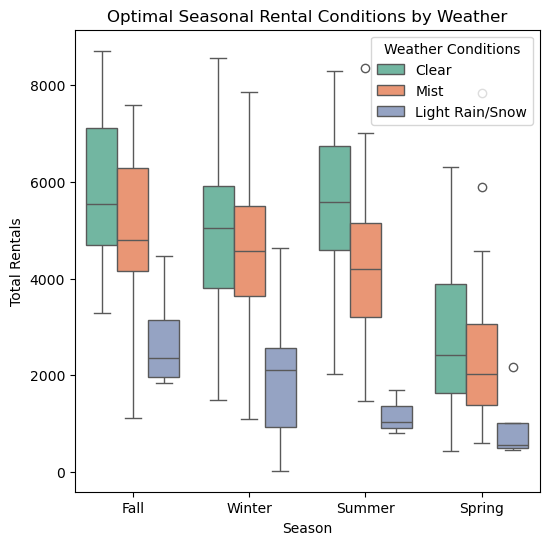

In [145]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='season', y='total_rentals', hue='weathersit', data=optimal_day_conditions, palette='Set2')
plt.title('Optimal Seasonal Rental Conditions by Weather')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.legend(title='Weather Conditions')
plt.show()

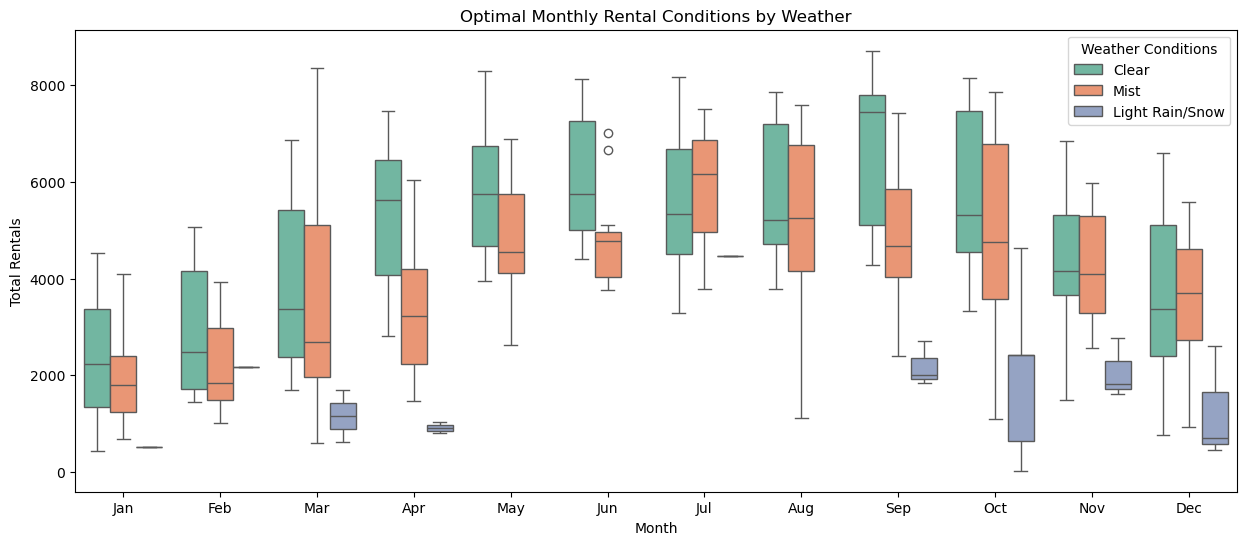

In [146]:
optimal_day_conditions['month'] = pd.Categorical(optimal_day_conditions['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

plt.figure(figsize=(15, 6))
sns.boxplot(x='month', y='total_rentals', hue='weathersit', data=optimal_day_conditions, palette='Set2')
plt.title('Optimal Monthly Rental Conditions by Weather')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.legend(title='Weather Conditions')
plt.show()

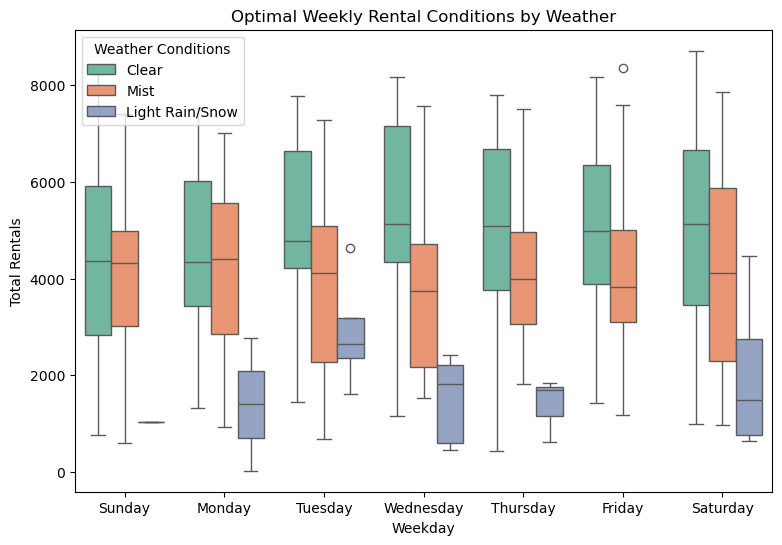

In [147]:
optimal_day_conditions['weekday'] = pd.Categorical(optimal_day_conditions['weekday'], categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True)

plt.figure(figsize=(9, 6))
sns.boxplot(x='weekday', y='total_rentals', hue='weathersit', data=optimal_day_conditions, palette='Set2')
plt.title('Optimal Weekly Rental Conditions by Weather')
plt.xlabel('Weekday')
plt.ylabel('Total Rentals')
plt.legend(title='Weather Conditions')
plt.show()

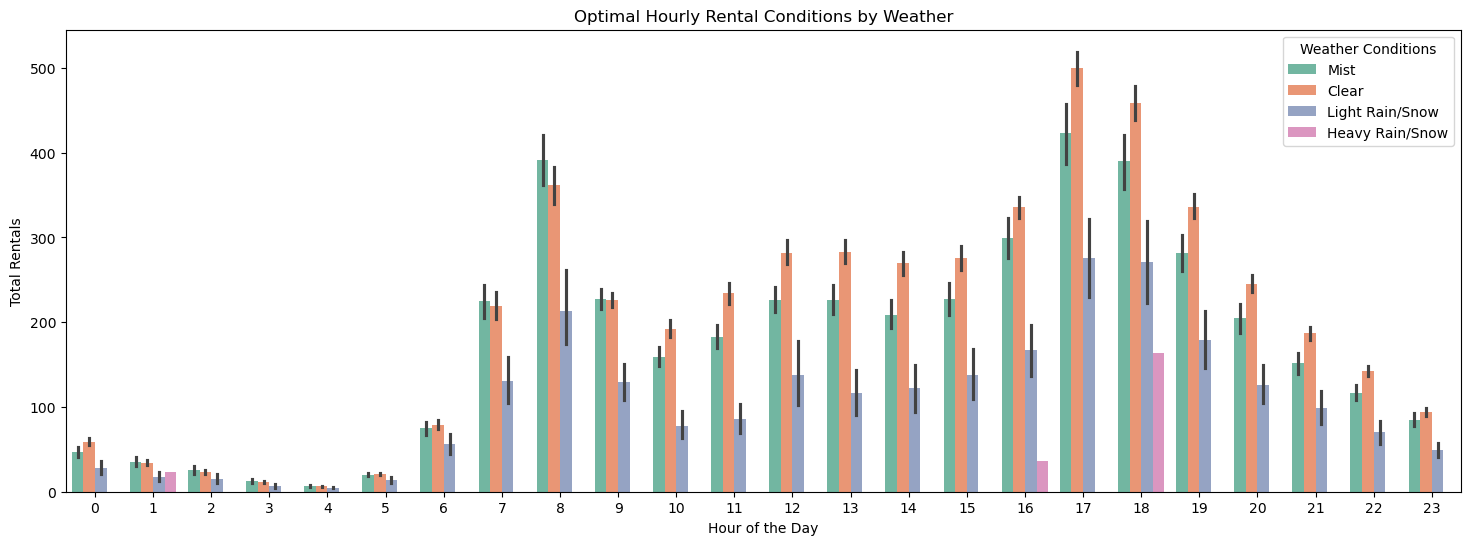

In [148]:
plt.figure(figsize=(18, 6))
sns.barplot(x='hour', y='total_rentals', hue='weathersit', data=optimal_hour_conditions, palette='Set2')
plt.title('Optimal Hourly Rental Conditions by Weather')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.legend(title='Weather Conditions')
plt.show()

### Pertanyaan 2:

In [149]:
anomaly_week = anomaly_day_conditions[
    (anomaly_day_conditions['date'] >= '2012-10-28') & (anomaly_day_conditions['date'] <= '2012-11-03')
]
anomaly_week = anomaly_week.sort_values(by='date')

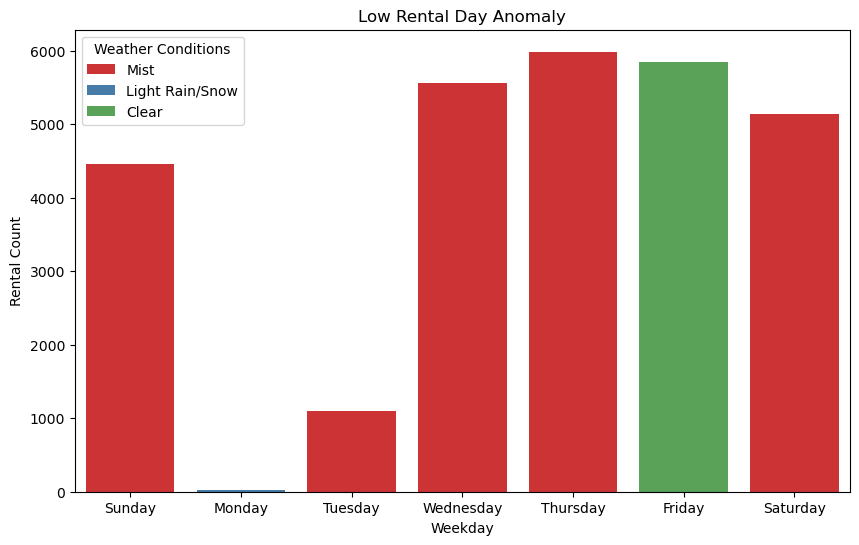

In [150]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='total_rentals', hue='weathersit', data=anomaly_week, palette='Set1')
plt.title('Low Rental Day Anomaly')
plt.xlabel('Weekday')
plt.ylabel('Rental Count')
plt.legend(title='Weather Conditions')
plt.show()

**Insight:**
- Pertanyaan 1: 
  - Pada grafik 1, Pelanggan lebih memilih menyewa sepeda saat cuaca cerah pada musim semi dan gugur, namun cuaca berkabut lebih disukai pelanggan pada musim dingin dibandingkan dengan musim semi
  - Pada grafik 2, Pelanggan menunjukkan preferensi kuat untuk menyewa sepeda pada hari Sabtu, terlepas dari kondisi cuaca.
  - Pada grafik 3, Penyewaan sepeda memuncak pada jam 08:00 pagi, serta 17:00–18:00 sore, di mana pelanggan memanfaatkan waktu sibuk berangkat dan pulang kerja, atau menikmati aktivitas outdoor saat senja.
- Pertanyaan 2:
  - Pada grafik 1, disimpulkan bahwa adanya terdapat indikasi error dalam data pada hari Senin pada periode minggu 2012-10-28 hingga 2012-11-03. Pola pada hari Senin ini tidak sesuai dengan pola hari lain dalam minggu yang sama, error ini mengindikasikan adanya kemungkinan gangguan dalam proses pengumpulan data atau anomali sistem pada periode tersebut

## Analisis Lanjutan (Opsional)

### Manual Grouping (Clustering)

In [151]:
clean_day_data.describe()

,instant,date,year,workingday,temp,atemp,humidity,windspeed,casual,registered,total_rentals
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [152]:
max_value = clean_day_data.describe()['total_rentals'].max()


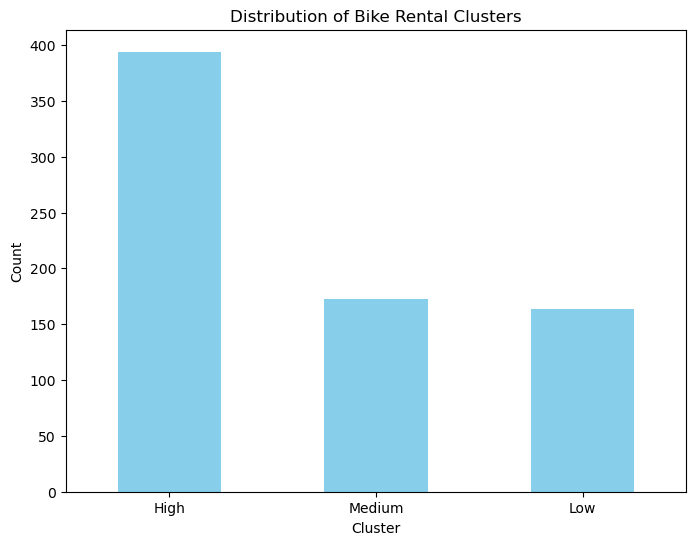

In [153]:
def cluster_count(x):
    if x < (max_value / 3):
        return 'Low'
    elif (max_value / 3) <= x < (max_value / 2):
        return 'Medium'
    elif (max_value / 2) <= x <= max_value:
        return 'High'
    else:
        return 'Out of Range'

clean_day_data['Cluster'] = clean_day_data['total_rentals'].apply(cluster_count)


clean_day_data['Cluster'].value_counts().plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Distribution of Bike Rental Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


**Insight:**
- Diagram batang ini menggambarkan distribusi data penyewaan sepeda ke dalam beberapa kluster: 'Rendah', 'Sedang', dan 'Tinggi'. Berdasarkan logika pengelompokan, total penyewaan dibagi menjadi tiga segmen berdasarkan nilai maksimum:
  - Rendah: Penyewaan kurang dari sepertiga dari nilai maksimum.
  - Sedang: Penyewaan antara sepertiga dan setengah dari nilai maksimum.
  - Tinggi: Penyewaan lebih dari setengah nilai maksimum hingga nilai maksimum.

- Distribusi kluster penyewaan menunjukkan proporsi data yang masuk ke dalam setiap kategori ini. Nilai 'High' memiliki jumlah yang terbesar, ini menunjukkan bahwa dataset cenderung condong ke nilai penyewaan yang tinggi, yang bisa menunjukkan periode-periode yang populer atau permintaan tinggi.



## Conclusion

- Conclusion pertanyaan 1:
  - Kondisi Optimal untuk Memaksimalkan Penyewaan Sepeda:
    - Musim dan Cuaca Favorit Pelanggan:
      - Pelanggan lebih sering menyewa sepeda pada musim semi dan gugur, terutama saat cuaca cerah.
      - Cuaca berkabut juga menarik banyak pelanggan, terutama di musim dingin.
    - Hari dan Jam Optimal untuk Penyewaan:
      - Penyewaan sepeda meningkat signifikan pada hari Sabtu, baik dalam cuaca cerah maupun kondisi lainnya.
      - Hari-hari akhir pekan (Minggu dan Sabtu) serta hari pertama kerja (Senin) juga cenderung menunjukkan lonjakan penyewaan.
      - Jam sibuk untuk penyewaan sepeda adalah pukul 08.00 pagi (waktu berangkat kerja) dan 16.00–18.00 sore (waktu pulang kerja dan masih dalam waktu senja), menunjukkan tren aktivitas pelanggan yang memanfaatkan waktu transisi kerja atau waktu luang di luar jam kerja.
- Conclusion pertanyaan 2:
  - Kejadian atau Anomali yang Mempengaruhi Perilaku Penyewaan Sepeda:
    - Anomali pada Tanggal 2012-10-29:
      - Pada tanggal ini, terjadi ketidaksesuaian data yang mengindikasikan adanya error atau hilangnya data pengambilan lanjutan. Hal ini terlihat dari perbedaan jumlah penyewaan yang tidak konsisten dibandingkan hari lainnya.
    - Preferensi Cuaca Tertentu Berdasarkan Musim:
      - Meski cuaca cerah cenderung menarik pelanggan di semua musim, cuaca berkabut lebih diminati pada musim dingin, yang berbeda dengan tren di musim semi. Hal ini menunjukkan perubahan perilaku pelanggan berdasarkan musim yang unik.
